# Prescriptive Analytics & Preparing The Data


In [1]:
import numpy as np
import pandas as pd

import sklearn as sk
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error, r2_score
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
print('numpy version:', np.__version__)
print('pandas version:', pd.__version__)
print('scikit-learn version:', sk.__version__)


numpy version: 1.16.4
pandas version: 0.23.4
scikit-learn version: 0.21.2


In [2]:
#Inserting the datasets
df = pd.read_csv(r"C:\Users\HP\Desktop\Datasets/Fifa_cleaned.csv",
                 encoding='UTF-8', sep=',', skiprows=0, index_col=False)
df.drop(['Number','work_rate'],axis=1,inplace=True)
data = pd.DataFrame(df)
df =df[df["age"]<=21]
df =df[df["potential"]>60]

In [3]:
#Changing Rates from string to numeric

def Rates(r):
    if r== 'Low':
        return 1
    elif r== 'Medium':
        return 2
    elif r== 'High':
        return 3

df['attacking_rates']= df['attacking_rates'].apply(Rates) 
df['defensive_rates']= df['defensive_rates'].apply(Rates) 

df.head(5)
    


,name,age,nationality,overall,potential,club,value,wage,international reputation,weak foot,...,aggression,interceptions,positioning,vision,penalties,composure,marking,gkreflexes,attacking_rates,defensive_rates
25,K. Mbappé,19,France,88,95,Paris Saint-Germain,81000000.0,100000.0,3.0,4.0,...,62.0,38.0,88.0,82.0,70.0,86.0,34.0,6.0,3,2
154,O. Dembélé,21,France,83,92,FC Barcelona,40000000.0,155000.0,3.0,5.0,...,54.0,36.0,79.0,84.0,75.0,75.0,42.0,13.0,3,1
155,Gabriel Jesus,21,Brazil,83,92,Manchester City,41000000.0,130000.0,2.0,3.0,...,73.0,32.0,88.0,77.0,78.0,82.0,53.0,15.0,3,3
225,M. de Ligt,18,Netherlands,82,91,Ajax,27000000.0,11000.0,2.0,4.0,...,79.0,79.0,44.0,63.0,40.0,77.0,84.0,10.0,2,2
227,Arthur,21,Brazil,82,90,FC Barcelona,32500000.0,125000.0,1.0,3.0,...,73.0,75.0,77.0,82.0,69.0,84.0,65.0,12.0,2,2


# Start Predicting the potential rate of a player

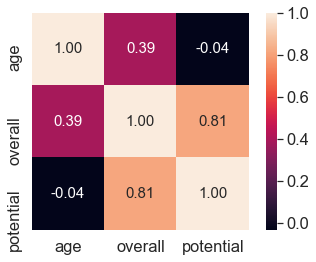

In [25]:
## Try to use correlation heat map to see how all the different combined features
#in this heat map it is explain that overall have high corelattion between potential outcome
import seaborn as sns
import matplotlib.pyplot as plt
cor=['age','overall','potential']
cm = np.corrcoef(df[cor].values,rowvar=0)
sns.set(font_scale=1.5)
hm = sns.heatmap(cm,
    cbar=True,
    annot=True,
    square=True,
    fmt='.2f',
    annot_kws={'size': 15},
    yticklabels=cor,
    xticklabels=cor)
plt.show()

In [5]:
#Lock the datasets
x = df.loc[:,['age','overall']]
y = df.loc[:,['potential']]


In [6]:
#feature Scalling and splitting the datasets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.25)

sc_x =StandardScaler()
sc_x.fit(x_train)
x_train= sc_x.fit_transform(x_train)
x_test= sc_x.transform(x_test)
print('Train shape:', x_train.shape, y_train.shape)
print('Test shape:', x_test.shape, y_test.shape)

Train shape: (3499, 2) (3499, 1)
Test shape: (1167, 2) (1167, 1)


In [7]:
import math
math.sqrt(len(y_test))

34.161381705077446

In [8]:
#Define the model with KNN
classifier= KNeighborsClassifier(n_neighbors=11,p=2,metric='euclidean')

#Predict the test result

classifier.fit(x_train,y_train)
y_pred= classifier.predict(x_test)
y_pred

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


array([72, 76, 79, ..., 81, 65, 76], dtype=int64)

In [9]:
#Evaluate Model
#Prediction Result
e = confusion_matrix(y_test,y_pred)
print('F1 Score')
print((f1_score(y_test,y_pred,pos_label='positive',average='micro')))
print('Accuracy Score')
print((accuracy_score(y_test,y_pred)))



F1 Score
0.14224507283633248
Accuracy Score
0.14224507283633248


C:\Users\HP\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1259: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


In [10]:
#Predict a player potential with Dummy Data

#Player number 1
print("Player Potential number 1 :")
#A player age is 17 ans overall is 75 
player1 = sc_x.transform([['17','75']])
print("Predict Player potential :",classifier.predict(player1))

#Player Number 2
print("Player Potential number 2 :")
#A player age is 20 and overall is 68
player2 = sc_x.transform([['20','68']])
print("Predict Player potential :",classifier.predict(player2))

#Player Number 3
print("Player Potential number 3 :")
#A player age is 19 and overall is 80
player3 = sc_x.transform([['19','80']])
print("Predict Player potential :",classifier.predict(player3))

#Player Number 4
print("Player Potential number 4 :")
#A player age is 21 and overall is 84
player4 = sc_x.transform([['21','83']])
print("Predict Player potential :",classifier.predict(player4))

#Player Number 5
print("Player Potential number 5 :")
#A player age is 16 and overall is 60
player5 = sc_x.transform([['16','60']])
print("Predict Player potential :",classifier.predict(player5))




Player Potential number 1 :
Predict Player potential : [88]
Player Potential number 2 :
Predict Player potential : [75]
Player Potential number 3 :
Predict Player potential : [86]
Player Potential number 4 :
Predict Player potential : [89]
Player Potential number 5 :
Predict Player potential : [75]


# Predicting Attacking Rates of a player

In [11]:
## Predicting Attacking Rates of a player 
#Lock the datasets
df1 = df.copy()
pd.options.display.float_format = '{:,.0f}'.format
#Lock the datasets
x1 = df1.loc[:,['finishing','shotpower','headingaccuracy']]
y1 = df1.loc[:,['attacking_rates']]

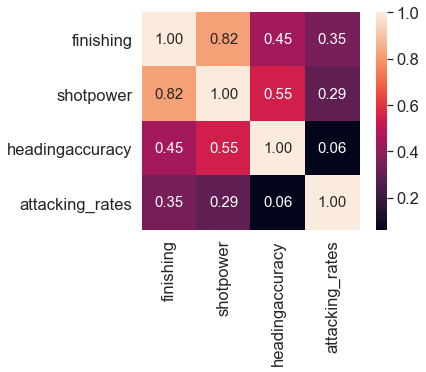

In [12]:
##Try to see the correlation using heat map
##As you can see in the map below finishing have the largest corelation wiht attacking_rates
cor1=['finishing','shotpower','headingaccuracy','attacking_rates']
cm1= np.corrcoef(df[cor1].values,rowvar=0)
sns.set(font_scale=1.5)
hm1 = sns.heatmap(cm1,
    cbar=True,
    annot=True,
    square=True,
    fmt='.2f',
    annot_kws={'size': 15},
    yticklabels=cor1,
    xticklabels=cor1)
plt.show()

In [13]:
#feature Scalling and splitting the datasets
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size=.25)

sc_x1 =StandardScaler()
sc_x1.fit(x1_train)
x1_train= sc_x1.fit_transform(x1_train)
x1_test= sc_x1.transform(x1_test)
print('Train shape:', x1_train.shape, y1_train.shape)
print('Test shape:', x1_test.shape, y1_test.shape)

Train shape: (3499, 3) (3499, 1)
Test shape: (1167, 3) (1167, 1)


In [14]:
#Define the model with KNN
classifier1= KNeighborsClassifier(n_neighbors=11,p=2,metric='euclidean')

#Predict the test result

classifier1.fit(x1_train,y1_train)
y1_pred= classifier1.predict(x1_test)
y1_pred

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


array([2, 2, 2, ..., 2, 2, 3], dtype=int64)

In [15]:
#Evaluate Model
#Prediction Result
e1 = confusion_matrix(y1_test,y1_pred)
print('F1 Score')
print(f1_score(y1_test,y1_pred,pos_label='positive',average='micro'))  
print('Accuracy Score')
print(accuracy_score(y1_test,y1_pred))

F1 Score
0.7352185089974294
Accuracy Score
0.7352185089974294


C:\Users\HP\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1259: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


In [16]:
##Start predicting attacking rates of a player

#Player number 1
print("Player  number 1 :")
#A player have finishing ,shot power , heading accuracy
player1 = sc_x1.transform([['85','76','83']])
print("Predict Player Attacking_rates :",classifier1.predict(player1))

#Player number 2
print("Player  number 3 :")
#A player have finishing ,shot power , heading accuracy
player2 = sc_x1.transform([['33','52','74']])
print("Predict Player  Attacking_rates :",classifier1.predict(player2))

#Player number 3
print("Player  number 3 :")
#A player have finishing ,shot power , heading accuracy
player3 = sc_x1.transform([['50','65','44']])
print("Predict Player  Attacking_rates :",classifier1.predict(player3))


Player  number 1 :
Predict Player Attacking_rates : [3]
Player  number 3 :
Predict Player  Attacking_rates : [2]
Player  number 3 :
Predict Player  Attacking_rates : [2]


# Predicting accuracy score with decision Tree Classifier

In [17]:
## Try to do decision tree with potential Player 
from sklearn.tree import DecisionTreeClassifier

x2_train, x2_test, y2_train, y2_test = train_test_split(x, y, test_size=.25)
clf=DecisionTreeClassifier(criterion = "entropy", splitter="best", max_depth=5, min_samples_split=50, min_samples_leaf=5)
clf.fit(x2_train, y2_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=50,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [18]:
#Predicting the dataset
y2_pred =clf.predict(x2_test)

print(y2_pred)

[75 71 85 ... 66 68 68]


In [19]:
#Accuracy score & Evaluating Model
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y2_test, y2_pred))
print(classification_report(y2_test, y2_pred))

[[ 0  3  0  9  2  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0]
 [ 0  3  0 10  3  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0]
 [ 0  2  0  4  5  0  0  3  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0]
 [ 0  3  0 11  4  0  6 14  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0]
 [ 0  1  0  5 11  0  6 16  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0]
 [ 0  0  0  9  5  4  5 15  2  0  2  0  0  3  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0]
 [ 0  2  0  4  6  4 13 18  1  0  1  0  2  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0]
 [ 0  0  0  4  3  0  8 20  4  0  0  1  3  1  2  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0]
 [ 0  0  0  3  4  1  5 24  3  0  1  1 15  4  3  2  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0]
 [ 0  0  0  2  4  0  5 24  8  0  2  3 14  4  2  1  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0]
 [ 0  0  0  1  1  0 

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# Try to predict using Decision Tree Regression

In [20]:
df.describe()

,age,overall,potential,value,wage,international reputation,weak foot,skill moves,body type,crossing,...,aggression,interceptions,positioning,vision,penalties,composure,marking,gkreflexes,attacking_rates,defensive_rates
count,"4,666","4,666","4,666","4,642","4,642","4,666","4,666","4,666","4,666","4,666",...,"4,666","4,666","4,666","4,666","4,666","4,666","4,666","4,666","4,666","4,666"
mean,20,61,73,"1,180,330","4,242",1,3,2,2,45,...,49,40,46,49,45,52,42,15,2,2
std,1,6,6,"3,006,853","8,855",0,1,1,1,16,...,15,19,18,13,14,10,18,15,0,0
min,16,46,61,"40,000","1,000",1,1,1,1,6,...,12,3,2,10,5,12,5,1,1,1
25%,19,56,69,"170,000","1,000",1,3,2,1,34,...,36,21,37,40,38,45,26,8,2,2
50%,20,61,73,"400,000","1,000",1,3,2,2,47,...,50,42,51,50,46,52,45,11,2,2
75%,21,65,78,"875,000","4,000",1,3,3,2,57,...,60,57,58,58,55,59,57,13,2,2
max,21,88,95,"81,000,000","155,000",3,5,5,3,83,...,94,85,88,85,82,86,84,88,3,3


In [21]:
#Training the data
x3_train, x3_test, y3_train, y3_test = train_test_split(x, y, test_size=.25)

In [22]:
#Using Regressor Method

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
reg =regressor.fit(x3_train, y3_train)

In [23]:
#Try to make prediction by using predict method
y3_pred = reg.predict(x3_test)
print(y3_pred)

[[69.06506243]
 [73.55115085]
 [75.27846316]
 ...
 [78.26098278]
 [79.98829509]
 [77.34139075]]


In [24]:
##Evaluate the prediction
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y3_test, y3_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y3_test, y3_pred)))
r_squarev = reg.score(x3_test, y3_test)
print("R2 accuracy", r_squarev)
##the mean absolute error for our algorithm is 2.12, which is less than 10 percent of the mean of all the values in 
##the 'potential' column.This means that our algorithm did a fine prediction job.

Mean Absolute Error: 1.9752509171164714
Root Mean Squared Error: 2.440035312179004
R2 accuracy 0.8115779667854733


NameError: name 'a' is not defined